<a href="https://colab.research.google.com/github/kridtapon/M2-Money-Supply/blob/main/M2_Money_Supply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Define the timeframe
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2024, 12, 31)

# Download M2 money supply data
m2_data = web.DataReader('M2SL', 'fred', start, end)

# Download inflation (CPI) and GDP data for comparison
inflation_data = web.DataReader('CPIAUCSL', 'fred', start, end)
gdp_data = web.DataReader('GDP', 'fred', start, end)


In [3]:
# Handle missing values by forward filling
m2_data = m2_data.ffill()
inflation_data = inflation_data.ffill()
gdp_data = gdp_data.ffill()

# Resample data to annual frequency for simplicity
m2_data_annual = m2_data.resample('A').last()
inflation_data_annual = inflation_data.resample('A').last()
gdp_data_annual = gdp_data.resample('A').last()


<ipython-input-3-7b934a0eaf5e>:7: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  m2_data_annual = m2_data.resample('A').last()
<ipython-input-3-7b934a0eaf5e>:8: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  inflation_data_annual = inflation_data.resample('A').last()
<ipython-input-3-7b934a0eaf5e>:9: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  gdp_data_annual = gdp_data.resample('A').last()


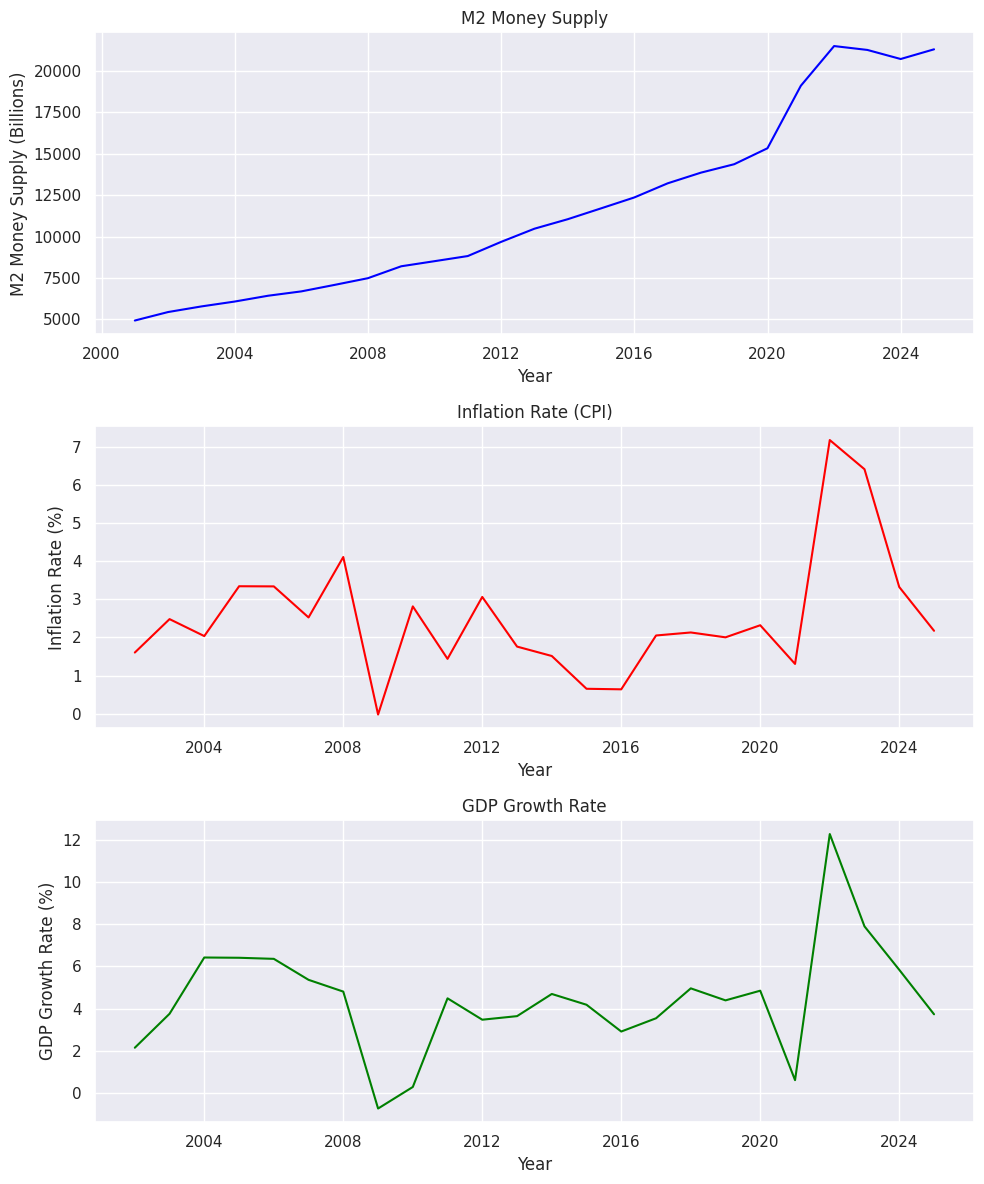

In [4]:
# Set plot style
sns.set(style="darkgrid")

# Create subplots for M2, Inflation, and GDP
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot M2 money supply
ax[0].plot(m2_data_annual.index, m2_data_annual, color='blue')
ax[0].set_title('M2 Money Supply')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('M2 Money Supply (Billions)')

# Plot Inflation rate
ax[1].plot(inflation_data_annual.index, inflation_data_annual.pct_change() * 100, color='red')
ax[1].set_title('Inflation Rate (CPI)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Inflation Rate (%)')

# Plot GDP
ax[2].plot(gdp_data_annual.index, gdp_data_annual.pct_change() * 100, color='green')
ax[2].set_title('GDP Growth Rate')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('GDP Growth Rate (%)')

plt.tight_layout()
plt.show()


In [5]:
# Merge the data into one DataFrame
data = pd.concat([m2_data_annual, inflation_data_annual, gdp_data_annual], axis=1)
data.columns = ['M2', 'Inflation', 'GDP']

# Drop any rows with missing values
data = data.dropna()

# Perform a correlation analysis
correlation_matrix = data.corr()
print(correlation_matrix)

# Run a linear regression model to predict inflation based on M2
X = sm.add_constant(data['M2'])  # Add constant to the model
y = data['Inflation']
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())


                 M2  Inflation       GDP
M2         1.000000   0.971514  0.979772
Inflation  0.971514   1.000000  0.994821
GDP        0.979772   0.994821  1.000000
                            OLS Regression Results                            
Dep. Variable:              Inflation   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     386.5
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           7.02e-16
Time:                        10:10:02   Log-Likelihood:                -91.042
No. Observations:                  25   AIC:                             186.1
Df Residuals:                      23   BIC:                             188.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   